# Proyecto 1 – Relación Minutos Ingreso
**Integrantes:** 

Jonathan Alonso  
Jheison Torres

## ¿Qué se quiere identificar.?
De acuerdo con el Dataset, se quiere identificar si hay una relación entre el total de minutos usados por el cliente con la compañía y el ingreso total de los clientes.Será posible afirmar que cuando una persona tiene un mayor ingreso, entonces es mayor la utilización de minutos, o todo lo contrario? 

In [7]:
#importar librerias
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
#cargar dataset
df = pd.read_csv('../Datos/Credito_dias.csv')
#muestra primeros registros de Dataframe
df.head()

,totmou,totrev,creditcd,eqpdays,Customer_ID
0,7269.0,906.58,Y,371,1082423
1,13552.0,1172.25,N,83,1069232
2,4152.0,577.39,Y,675,1031705
3,1863.0,294.26,Y,218,1089806
4,4155.0,433.16,N,222,1076695


In [11]:
#muestra informacion DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   totmou       10000 non-null  float64
 1   totrev       10000 non-null  float64
 2   creditcd     9848 non-null   object 
 3   eqpdays      10000 non-null  int64  
 4   Customer_ID  10000 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 390.8+ KB


In [13]:
#verifica tipos de dato
df.dtypes

totmou         float64
totrev         float64
creditcd        object
eqpdays          int64
Customer_ID      int64
dtype: object

In [15]:
#valida cantidad de nulos
df.isnull().sum()

totmou           0
totrev           0
creditcd       152
eqpdays          0
Customer_ID      0
dtype: int64

In [17]:
#Valida frecuencia  
df['creditcd'].value_counts(dropna=False)

creditcd
Y      6796
N      3052
NaN     152
Name: count, dtype: int64

In [19]:
#Eliminar valores nulos
df.dropna(inplace=True)
#verifica Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9848 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   totmou       9848 non-null   float64
 1   totrev       9848 non-null   float64
 2   creditcd     9848 non-null   object 
 3   eqpdays      9848 non-null   int64  
 4   Customer_ID  9848 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 461.6+ KB


In [21]:
#valida cantidad filas y columnas
df.shape

(9848, 5)

In [23]:
#valida información DF
df.describe()

,totmou,totrev,eqpdays,Customer_ID
count,9848.000000,9848.000000,9848.000000,9.848000e+03
mean,7697.900458,1042.302115,386.982433,1.049854e+06
std,8662.012934,857.945971,252.473800,2.875331e+04
min,0.000000,11.100000,-5.000000,1.000014e+06
25%,2575.000000,526.627500,210.000000,1.024992e+06
50%,5261.500000,820.955000,338.000000,1.049404e+06
75%,9842.000000,1272.975000,523.000000,1.074646e+06
max,163264.176700,13426.600000,1823.000000,1.099992e+06


creditcd
Y    6796
N    3052
Name: count, dtype: int64


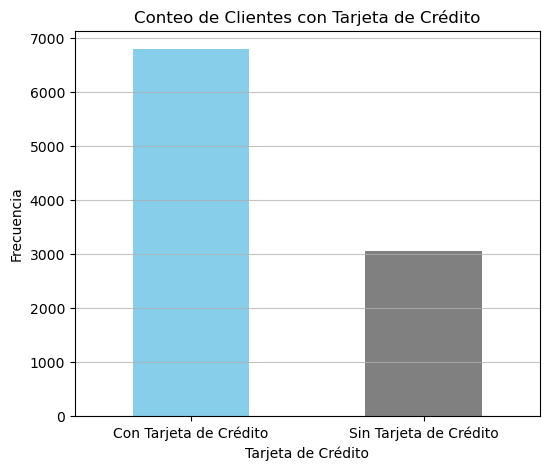

In [25]:
#Frecuencia de tarjeta de crédito
credito = df['creditcd'].value_counts()
print(credito)

# Crea el gráfico de barras
plt.figure(figsize=(6, 5))
credito.plot(kind='bar', color=['skyblue', 'gray'])

# Cambia las descripciones de las leyendas
plt.title('Conteo de Clientes con Tarjeta de Crédito')
plt.xlabel('Tarjeta de Crédito')
plt.ylabel('Frecuencia')
plt.xticks(ticks=range(len(credito)), labels=['Con Tarjeta de Crédito', 'Sin Tarjeta de Crédito'], rotation=0)  
plt.grid(axis='y', alpha=0.75)
plt.show()

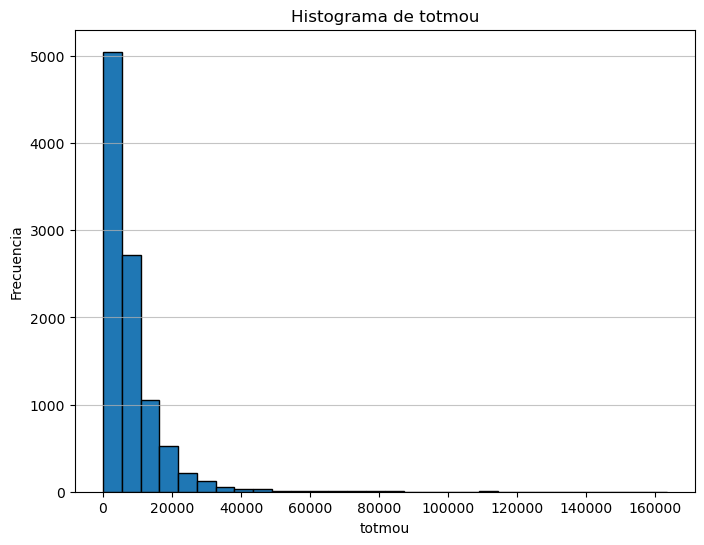

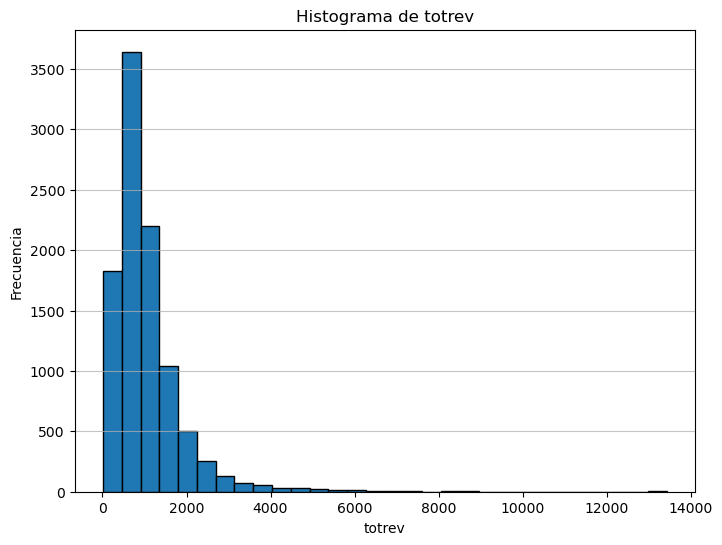

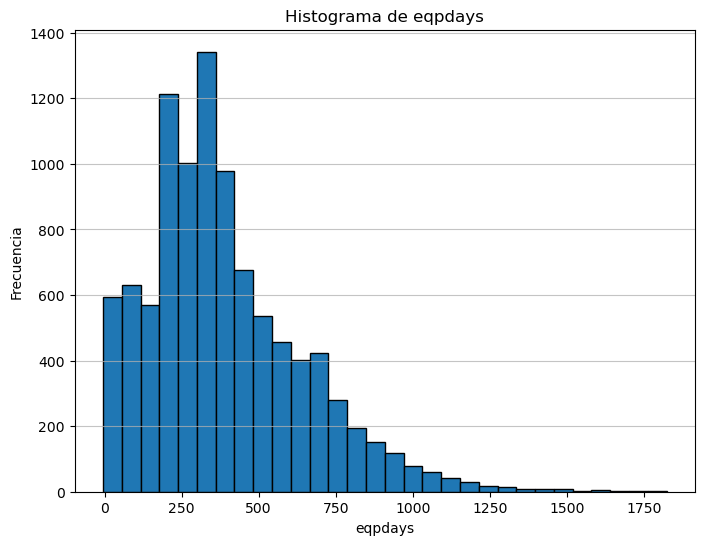

In [27]:
#selecciona columnas numericas
cols = df[['totmou','totrev','eqpdays']]

# Crea un histograma para cada variable numérica
for col in cols:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=30, edgecolor='black')  
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

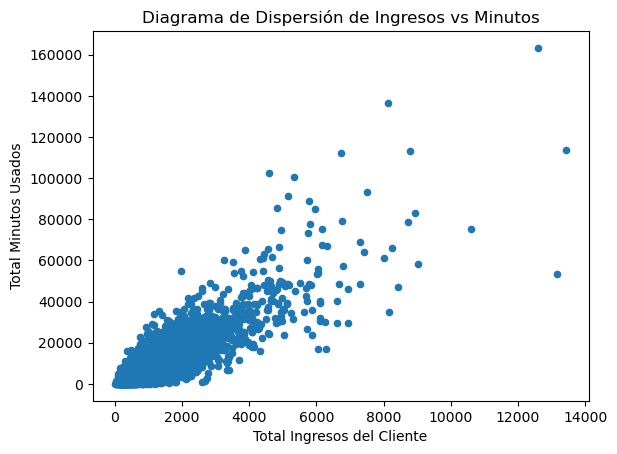

In [29]:
#grafico dispersion
df.plot(kind='scatter',x='totrev',y='totmou')
plt.title("Diagrama de Dispersión de Ingresos vs Minutos")
plt.xlabel("Total Ingresos del Cliente")
plt.ylabel("Total Minutos Usados")
plt.show()

In [31]:
#Matriz de correlación
matriz_cor = df[['totrev','totmou']].corr()
print(matriz_cor)

          totrev    totmou
totrev  1.000000  0.835279
totmou  0.835279  1.000000


Con el gráfico de dispersión creado, podemos concluir que si existe una relación entre el total de ingresos del cliente y el total de minutos usados. Se comprueba lo anterior con un 83% de correlación entre las variables **totrev** y **totmou**.

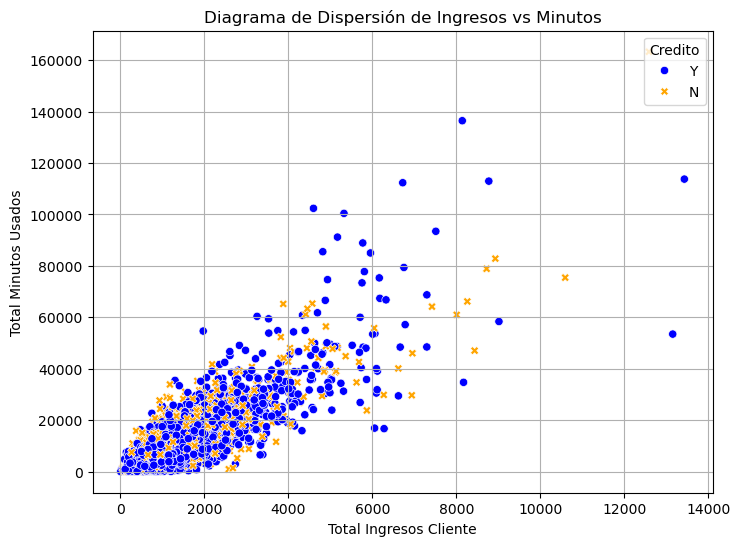

In [33]:
# Crea el diagrama de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='totrev', y='totmou', hue='creditcd', palette={'Y': 'blue', 'N': 'orange'}, style='creditcd', markers={'Y': 'o', 'N': 'X'})

# Añade título y etiquetas
plt.title('Diagrama de Dispersión de Ingresos vs Minutos')
plt.xlabel('Total Ingresos Cliente')
plt.ylabel('Total Minutos Usados')

# Muestra la leyenda
plt.legend(title='Credito', loc='upper right')

plt.grid()
plt.show()

Dado el gráfico anterior, se puede concluir que el hecho de que un cliente tenga crédito o no, NO afecta el comportamiento de estas variables. Se evidencia un comportamiento igual al identificado con el diagrama de dispersión creado inicialmente.